In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv("market_pipe_thickness_loss_dataset.csv")

In [3]:
df.head()


,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical


## checking datatype


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [ ]:
## checking duplicates

df[df.duplicated()]

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition


In [ ]:
## checking null values 

df[df.isnull().any(axis=1)]

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition


In [ ]:
## checking count of specific conditions
df.Condition.value_counts()

Condition
Critical    487
Moderate    299
Normal      214
Name: count, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pipe_Size_mm,1000.0,522.00000,443.703587,50.00,150.0000,300.000,800.0000,1500.00
Thickness_mm,1000.0,16.07353,10.548358,3.00,7.3575,12.930,23.0275,49.53
Max_Pressure_psi,1000.0,1004.10000,812.843099,150.00,300.0000,900.000,1500.0000,2500.00
Temperature_C,1000.0,42.59560,41.127071,-50.00,13.4000,41.200,69.1500,149.70
Corrosion_Impact_Percent,1000.0,9.74599,5.817492,0.00,4.4925,9.720,14.8325,20.00
Thickness_Loss_mm,1000.0,4.88630,2.901123,0.01,2.3650,4.915,7.4325,9.99
Material_Loss_Percent,1000.0,46.74756,46.602553,0.08,15.6650,31.660,61.0350,318.75
Time_Years,1000.0,12.96100,7.135993,1.00,7.0000,13.000,19.0000,25.00


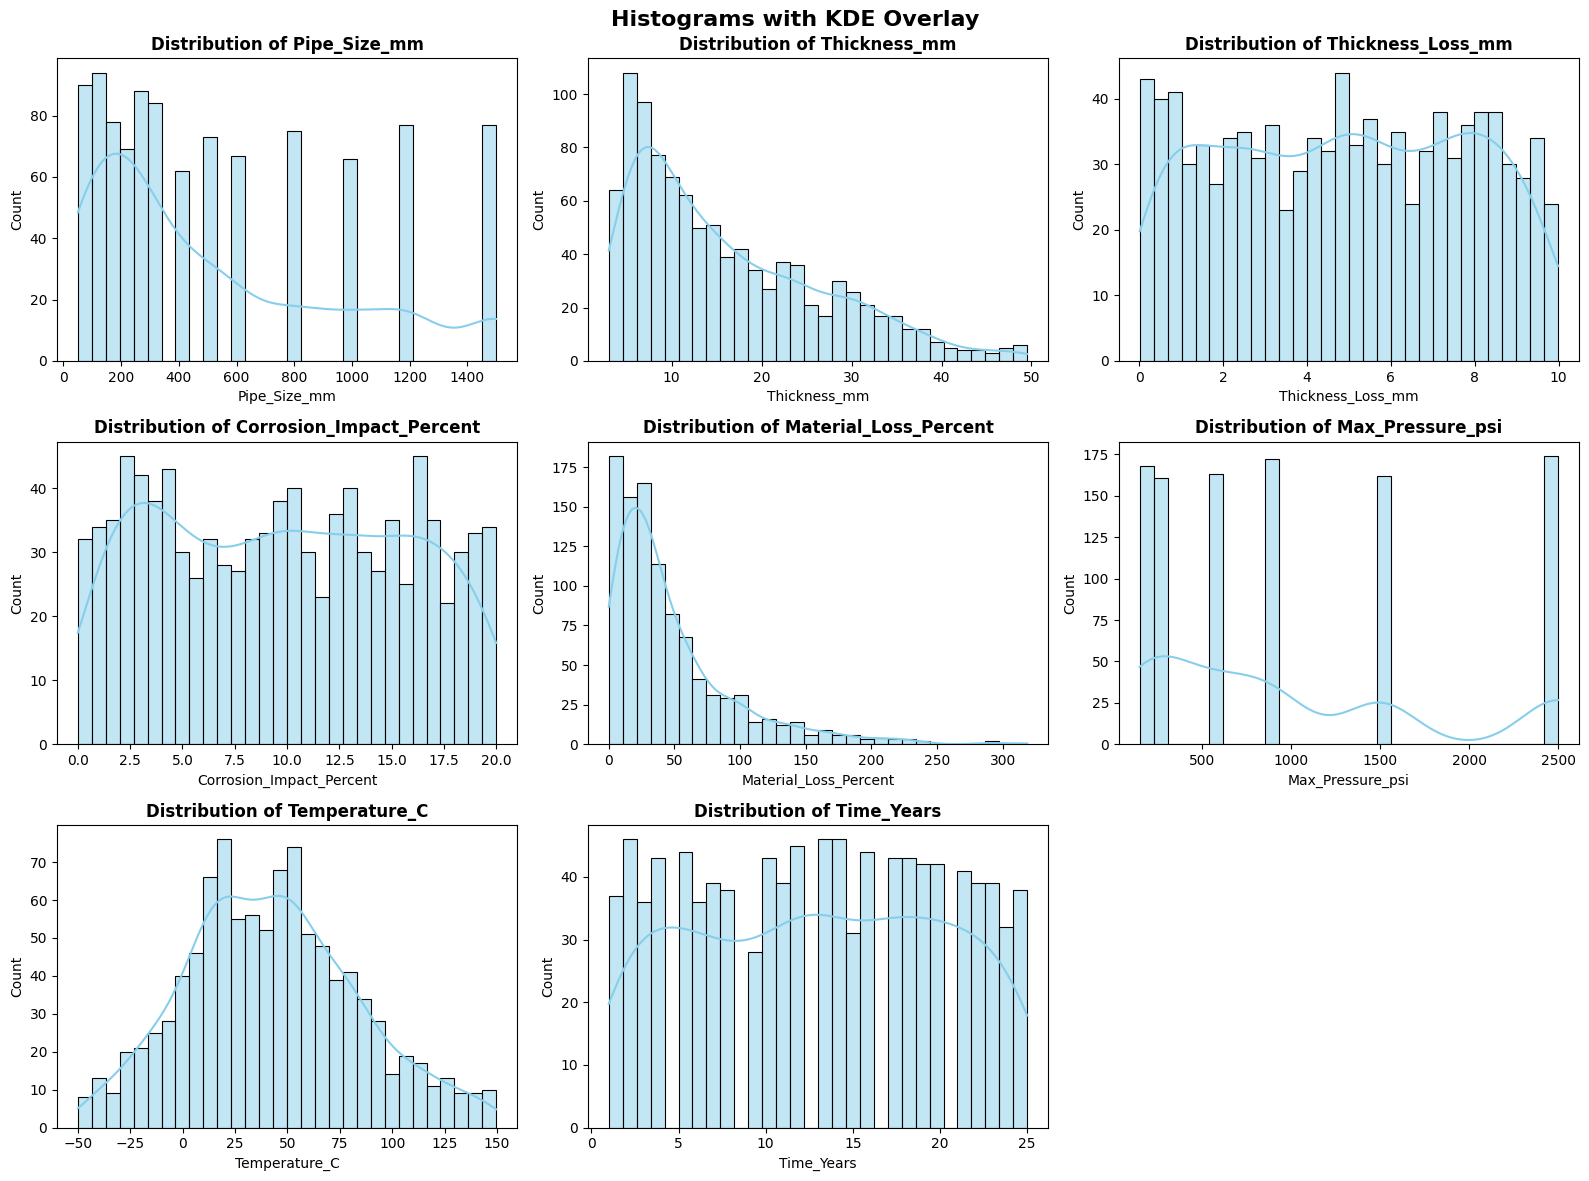

In [ ]:
num_cols = ['Pipe_Size_mm','Thickness_mm','Thickness_Loss_mm','Corrosion_Impact_Percent','Material_Loss_Percent','Max_Pressure_psi','Temperature_C','Time_Years']

# Histograms
plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=12, weight='bold')
plt.suptitle("Histograms with KDE Overlay", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

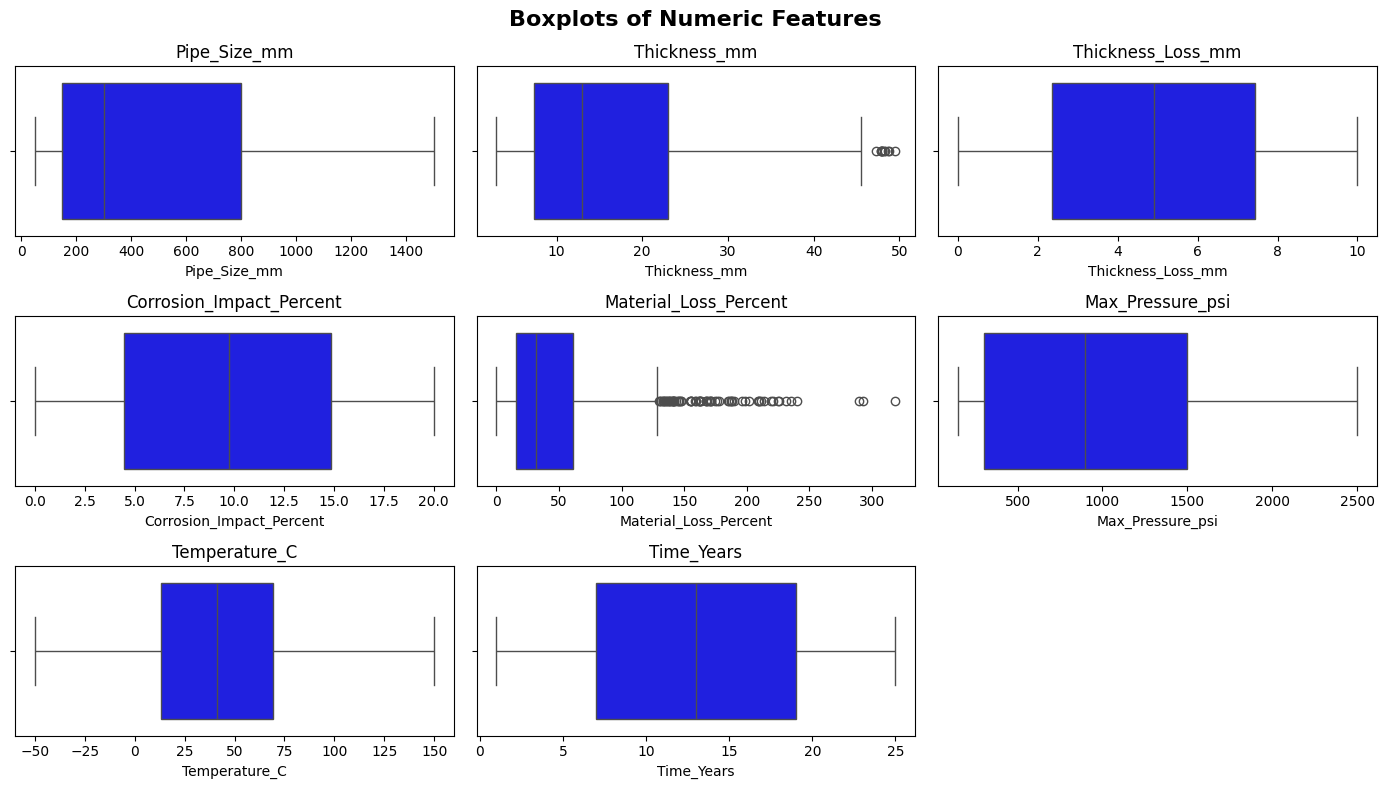

In [38]:

plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)
plt.suptitle("Boxplots of Numeric Features", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

C:\Users\Binnu Sangem\AppData\Local\Temp\ipykernel_9532\1646710601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", edgecolor='black')
C:\Users\Binnu Sangem\AppData\Local\Temp\ipykernel_9532\1646710601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", edgecolor='black')


ValueError: num must be an integer with 1 <= num <= 2, not 3

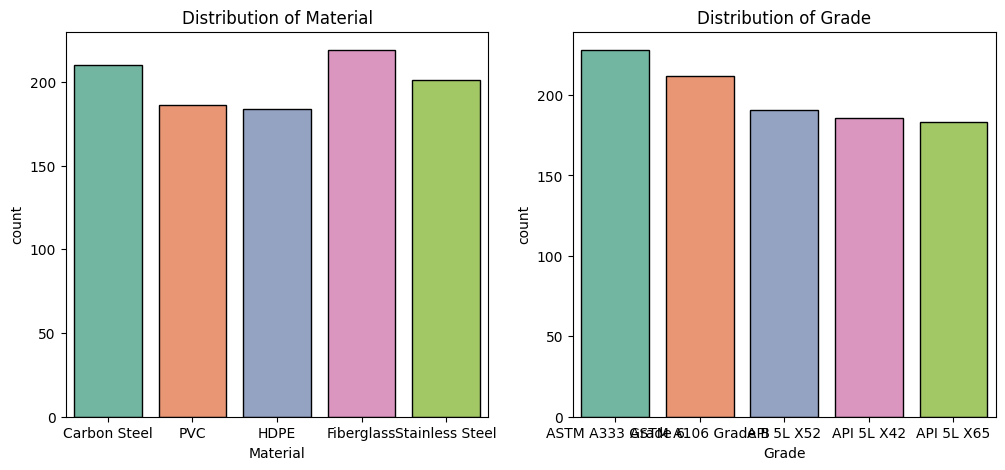

In [33]:
cat_cols = ['Material','Grade','Condition']
plt.figure(figsize=(12,5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1,2,i)
    sns.countplot(data=df, x=col, palette="Set2", edgecolor='black')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

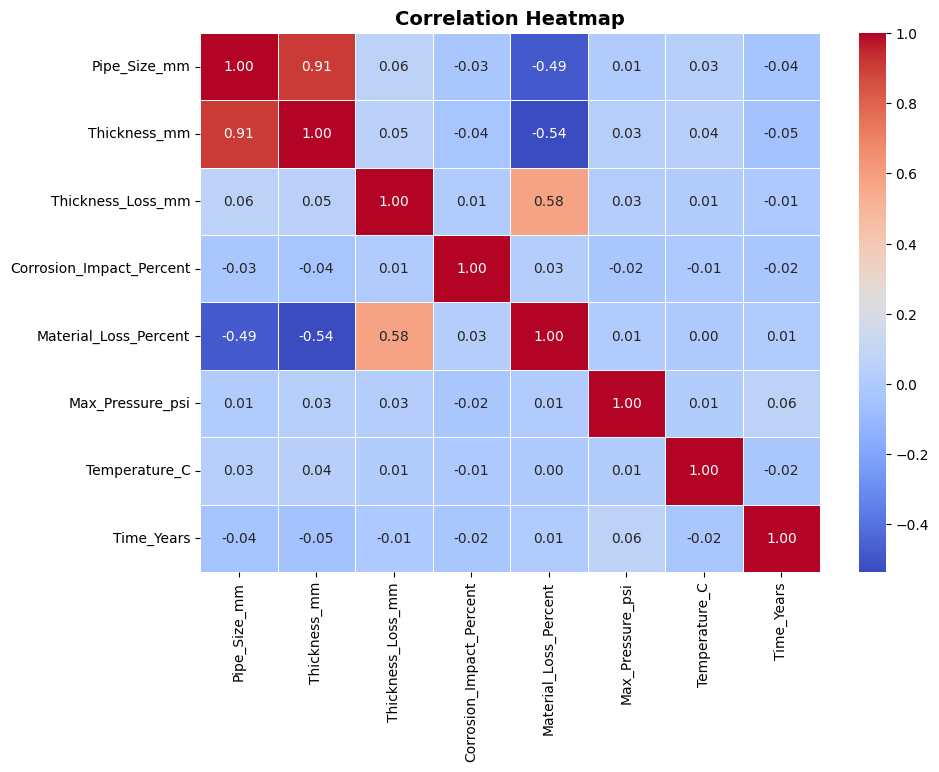

In [34]:
# Correlation heatmap
plt.figure(figsize=(10,7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, weight='bold')
plt.show()

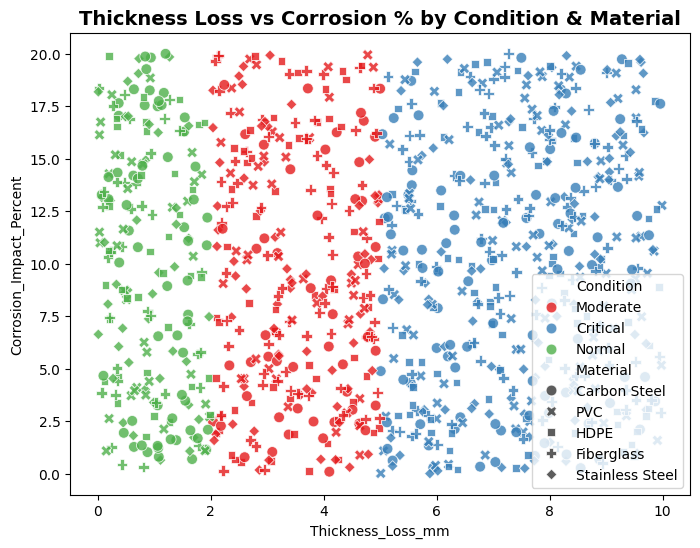

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Thickness_Loss_mm", y="Corrosion_Impact_Percent",
                hue="Condition", style="Material", palette="Set1", alpha=0.8, s=60)
plt.title("Thickness Loss vs Corrosion % by Condition & Material", fontsize=14, weight='bold')
plt.show()

In [41]:
#Categorical counts
print("\nMaterial distribution:\n", df['Material'].value_counts(normalize=True))
print("\nConditions distribution:\n", df['Condition'].value_counts(normalize=True))

#Group comparisons
print("\nAvg Thickness Loss by Material:\n", 
      df.groupby('Material')['Thickness_Loss_mm'].mean().sort_values(ascending=False))

print("\nAvg Corrosion % by Condition:\n", 
      df.groupby('Condition')['Corrosion_Impact_Percent'].mean().sort_values(ascending=False))




Material distribution:
 Material
Fiberglass         0.219
Carbon Steel       0.210
Stainless Steel    0.201
PVC                0.186
HDPE               0.184
Name: proportion, dtype: float64

Conditions distribution:
 Condition
Critical    0.487
Moderate    0.299
Normal      0.214
Name: proportion, dtype: float64

Avg Thickness Loss by Material:
 Material
PVC                5.274247
Fiberglass         4.900731
Stainless Steel    4.845124
HDPE               4.843913
Carbon Steel       4.604190
Name: Thickness_Loss_mm, dtype: float64

Avg Corrosion % by Condition:
 Condition
Normal      9.854346
Critical    9.794702
Moderate    9.589097
Name: Corrosion_Impact_Percent, dtype: float64


In [ ]:

# 1. Z-Score Method
outliers_z = {}
for col in num_cols:
    mean, std = df[col].mean(), df[col].std()
    z_scores = (df[col] - mean) / std
    outliers_z[col] = (np.abs(z_scores) > 3).sum()   # count >3σ
print("Outliers (Z-Score > 3):\n", outliers_z)

# 2. IQR Method 
outliers_iqr = {}
for col in num_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers_iqr[col] = ((df[col] < lower) | (df[col] > upper)).sum()
print("\nOutliers (IQR Method):\n", outliers_iqr)


Outliers (Z-Score > 3):
 {'Pipe_Size_mm': np.int64(0), 'Thickness_mm': np.int64(10), 'Thickness_Loss_mm': np.int64(0), 'Corrosion_Impact_Percent': np.int64(0), 'Material_Loss_Percent': np.int64(22), 'Max_Pressure_psi': np.int64(0), 'Temperature_C': np.int64(0), 'Time_Years': np.int64(0)}

Outliers (IQR Method):
 {'Pipe_Size_mm': np.int64(0), 'Thickness_mm': np.int64(11), 'Thickness_Loss_mm': np.int64(0), 'Corrosion_Impact_Percent': np.int64(0), 'Material_Loss_Percent': np.int64(70), 'Max_Pressure_psi': np.int64(0), 'Temperature_C': np.int64(0), 'Time_Years': np.int64(0)}


In [48]:
df['time_thickness_interaction'] = df['Time_Years'] * df['Thickness_Loss_mm']
df['time_corrosion_interaction'] = df['Time_Years'] * df['Corrosion_Impact_Percent']
df['young_critical'] = ((df['Time_Years'] < 5) & (df['Condition']=='Critical')).astype(int)


In [49]:
# Quick check
df[['Time_Years','Thickness_Loss_mm','Corrosion_Impact_Percent','time_thickness_interaction',
    'time_corrosion_interaction','young_critical']].head()

,Time_Years,Thickness_Loss_mm,Corrosion_Impact_Percent,time_thickness_interaction,time_corrosion_interaction,young_critical
0,2,4.91,16.04,9.82,32.08,0
1,4,7.32,7.38,29.28,29.52,1
2,7,6.32,2.12,44.24,14.84,0
3,19,6.20,5.58,117.80,106.02,0
4,20,8.58,12.29,171.60,245.80,0


In [51]:
# Thresholds (percentile-based)
tl_90 = df['Thickness_Loss_mm'].quantile(0.90)
cor_90 = df['Corrosion_Impact_Percent'].quantile(0.90)
mat_90 = df['Material_Loss_Percent'].quantile(0.90)
press_90 = df['Max_Pressure_psi'].quantile(0.90)
temp_90 = df['Temperature_C'].quantile(0.90)

tl_75 = df['Thickness_Loss_mm'].quantile(0.75)
cor_75 = df['Corrosion_Impact_Percent'].quantile(0.75)

def label_row(r):
    # 1. High damage readings (acute risk)
    if r['Thickness_Loss_mm'] >= tl_90:
        return 1
    if r['Corrosion_Impact_Percent'] >= cor_90:
        return 1
    if r['Material_Loss_Percent'] >= mat_90:
        return 1
    if (r['Condition'] == 'Critical') and \
       ((r['Max_Pressure_psi'] >= press_90) or (r['Temperature_C'] >= temp_90)):
        return 1

    # 2. Old pipes with moderate wear
    if (r['Time_Years'] >= 15) and \
       ((r['Thickness_Loss_mm'] >= tl_75) or (r['Corrosion_Impact_Percent'] >= cor_75)):
        return 1

    # 3. Young pipes in critical condition
    if r['young_critical'] == 1:
        return 1

    # Otherwise safe
    return 0

# Apply updated labeling
df['Maintenance_Required'] = df.apply(label_row, axis=1)

# Check distribution
print("Class balance for Maintenance_Required:\n", df['Maintenance_Required'].value_counts(normalize=True))


Class balance for Maintenance_Required:
 Maintenance_Required
0    0.561
1    0.439
Name: proportion, dtype: float64


In [52]:
df.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Maintenance_Required,time_thickness_interaction,time_corrosion_interaction,young_critical
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,9.82,32.08,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,29.28,29.52,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,44.24,14.84,0
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,0,117.80,106.02,0
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1,171.60,245.80,0


In [53]:
X = df.drop(columns=['Maintenance_Required'])
y = df['Maintenance_Required']


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Categorical and numeric columns
cat_cols = ['Condition','Material','Grade']
num_cols = [col for col in X_train.columns if col not in cat_cols]

# Preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),             # keep numeric as-is
        ('cat', OneHotEncoder(drop='first'), cat_cols) # one-hot encode
    ]
)

# Base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=500, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Stacking Classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stack_clf)
])


In [56]:
# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\Binnu Sangem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Binnu Sangem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.99      1.00      0.99        88

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
 [[111   1]
 [  0  88]]
ROC-AUC Score: 0.9988839285714286


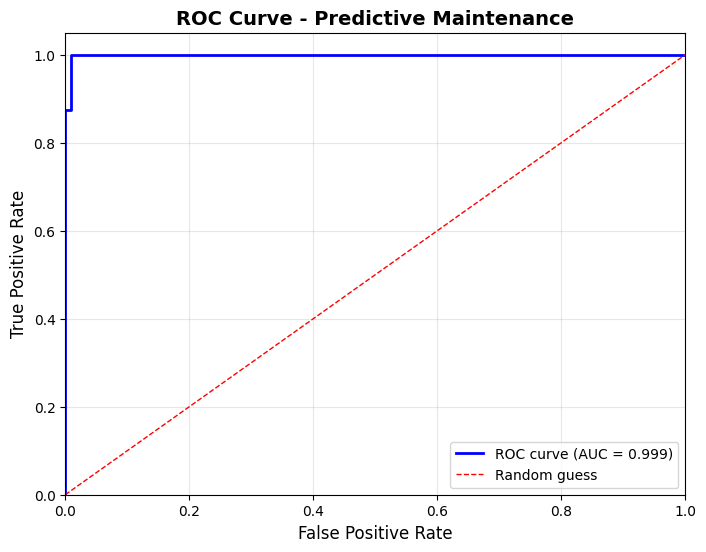

In [57]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_proba = pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Predictive Maintenance', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [58]:
import joblib
joblib.dump(pipeline, 'predictive_maintenance_pipeline.pkl')


['predictive_maintenance_pipeline.pkl']